In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")


from sqlalchemy import create_engine

# Replace with your actual credentials
username = 'root'
password = '000000' # Your database password here
host = 'localhost'
port = '3306'
database = 'banking_db'

# Create the connection string
connection_string = f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Example: Read the 'accounts' table into a DataFrame
df = pd.read_sql('SELECT * FROM banking', con=engine)

df.head()

,﻿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ﻿Client ID                3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [6]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [7]:
df.isnull().sum()

Client ID                  0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### 1. Customer Demographics Analysis:

-   A. Age Distribution:
    -   Are customers predominantly young professionals, middle-aged, or retirees? 

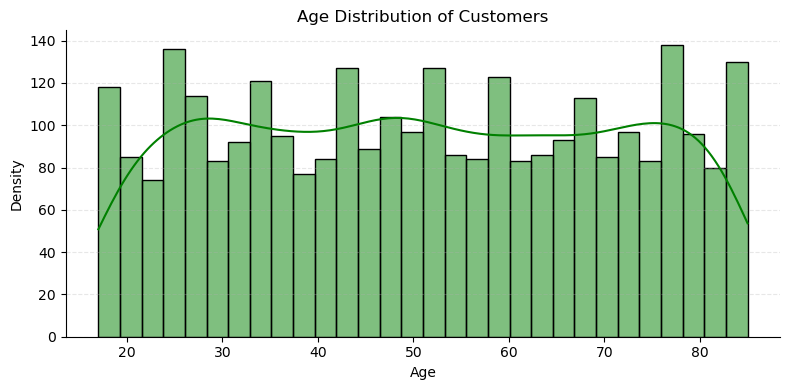

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(
    df['Age'],
    bins=30,
    kde=True,
    color='green',
    #stat='density',
    edgecolor='black'
)

plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.3)


sns.despine()
plt.tight_layout()
plt.show()

-  ### Age Distribution Insights:

   1. **Overall Shape**:
      - The age distribution of customers appears to be **bimodal**, with two prominent peaks.
      - There is a significant concentration of customers in their **20s and 30s**, as well as another peak around the **70s and 80s**.

   2. **Peak Ages**:
      - The first peak occurs around **ages 25-35**, indicating a high density of younger customers.
      - The second peak occurs around **ages 75-85**, suggesting a notable presence of older customers.

   3. **Density Trends**:
      - The density of customers decreases gradually from the early **20s** to the mid-**40s**.
      - After the mid-**40s**, there is a slight increase in density, peaking again in the **70s and 80s**.
      - The density drops sharply after the second peak, indicating fewer customers in their late **80s** and beyond.

   4. **Smooth Density Curve**:
      - The green curve (likely a kernel density estimate) provides a smoothed representation of the age distribution.
      - This curve confirms the bimodal nature of the data and highlights the gradual decline in density between the two peaks.

   5. **Customer Segmentation**:
      - The data suggests that the customer base can be segmented into two primary groups:
      - **Younger Segment**: Primarily consisting of customers in their **20s and 30s**.
      - **Older Segment**: Primarily consisting of customers in their **70s and 80s**.


___________

-   B.  Nationality Distribution:
    -   What are the most common nationalities among the customers?

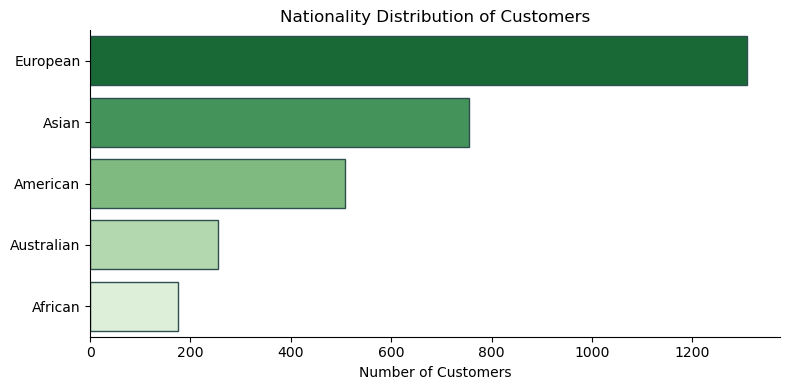

In [10]:
df_nationality = df['Nationality'].value_counts().to_frame().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(
    data = df_nationality,
    x= 'count',
    y='Nationality',
    palette='Greens_r',
    edgecolor='darkslategray'
)

plt.title('Nationality Distribution of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('')

sns.despine()
plt.tight_layout()
plt.show()


-  #### Nationality Distribution Insights:

   1. **Dominance of European Customers**:
      - The nationality with the highest number of customers is **European**, significantly outpacing all other nationalities.
      - The bar for European customers extends to approximately **1,300**, making it the largest group by a considerable margin.

   2. **Second-Highest Group: Asian Customers**:
      - The second-largest group is **Asian customers**, with a count of around **750**.
      - This group is roughly half the size of the European customer base but still represents a substantial portion of the total customer population.

   3. **American Customers**:
      - The third-largest group is **American customers**, with a count of approximately **500**.
      - This group is smaller than both European and Asian customers but still forms a notable segment of the customer base.

   4. **Australian Customers**:
      - The fourth-largest group is **Australian customers**, with a count of around **250**.
      - This group is considerably smaller compared to the top three nationalities but still contributes to the overall customer diversity.

   5. **African Customers**:
      - The smallest group among the top five is **African customers**, with a count of approximately **150**.
      - This group represents the lowest proportion of customers in the displayed data.

_____

-   C.  Occupation Distributions:
    -   Identify the most common occupations among customers (Top 10).

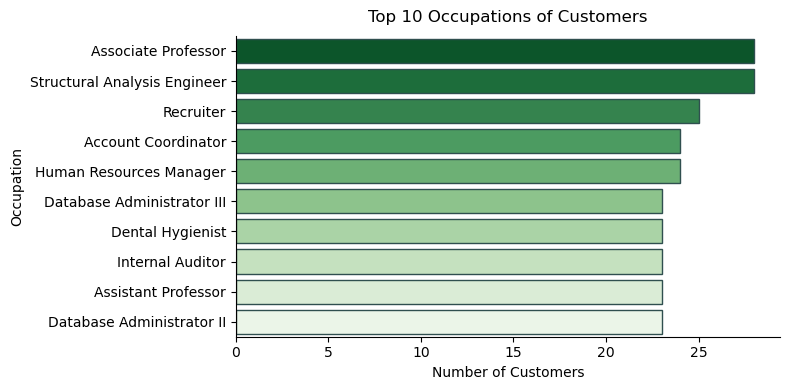

In [11]:
df_occupation = df['Occupation'].value_counts().to_frame().reset_index().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_occupation,
    y='Occupation',
    x='count',
    palette='Greens_r',
    edgecolor='darkslategray',

)

plt.title('Top 10 Occupations of Customers', pad=10)
plt.ylabel('Occupation')
plt.xlabel('Number of Customers')
sns.despine()
plt.tight_layout()
plt.show()

-   ### Key Insights:

1. **Dominance of European Customers**:
   - The nationality with the highest number of customers is **European**, significantly outpacing all other nationalities.
   - The bar for European customers extends to approximately **1,300**, making it the largest group by a considerable margin.

2. **Second-Highest Group: Asian Customers**:
   - The second-largest group is **Asian customers**, with a count of around **750**.
   - This group is roughly half the size of the European customer base but still represents a substantial portion of the total customer population.

3. **American Customers**:
   - The third-largest group is **American customers**, with a count of approximately **500**.
   - This group is smaller than both European and Asian customers but still forms a notable segment of the customer base.

4. **Australian Customers**:
   - The fourth-largest group is **Australian customers**, with a count of around **250**.
   - This group is considerably smaller compared to the top three nationalities but still contributes to the overall customer diversity.

5. **African Customers**:
   - The smallest group among the top five is **African customers**, with a count of approximately **150**.
   - This group represents the lowest proportion of customers in the displayed data.


_________

-   D. Gender & Loyalty Classification:
    -   Identify if loyalty tiers are distributed differently by gender.

In [12]:
# mapping the genderid column 
gender_mapping = {1:"Male", 2:"Female"}
df['Gender'] = df['GenderId'].map(gender_mapping)

# df.head()

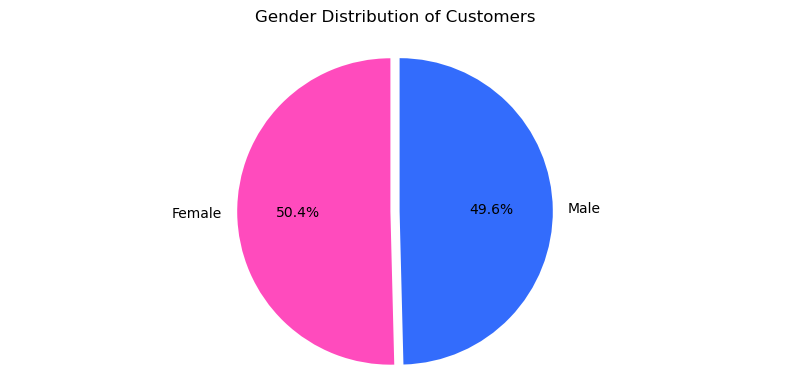

In [13]:
# creating dataframe for gender distribution
df_gender = df['Gender'].value_counts().to_frame().reset_index()
df_gender.columns = ['Gender', 'Count']  # Rename columns for clarity

# plotting
plt.figure(figsize=(8, 4))
plt.pie(
    df_gender['Count'],
    labels=df_gender["Gender"],
    autopct='%1.1f%%',
    colors=["#ff4bbd", "#336cfc"],
    startangle=90,
    explode=(0.03, 0.03),  # Slightly explode the slices
)

plt.title('Gender Distribution of Customers', pad=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


-   #### Observations:

    1. **Near-Equal Split**:
    - The gender distribution of customers is nearly evenly split between **Female** and **Male**.
    - **Females** constitute **50.4%** of the customer base, while **Males** make up **49.6%**.

    2. **Slight Female Majority**:
    - There is a very slight majority of **Female** customers, with only a 0.8 percentage point difference (50.4% vs. 49.6%).

    3. **Balanced Representation**:
    - The near-equal distribution indicates that the customer base is representative of both genders, without significant skewness toward either group.


_______________________

-   Loyalty Classification by Gender:

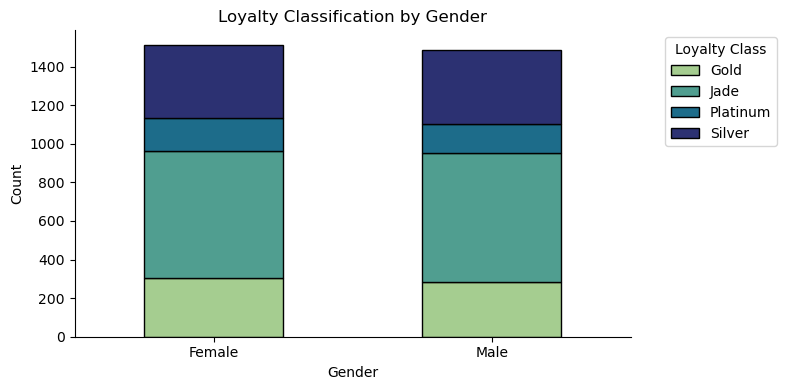

In [14]:
# use crosstab() to create a contingency table to see the relationship between Gender and Loyalty Classification
gender_loyalty = pd.crosstab(df['Gender'], df['Loyalty Classification'])

gender_loyalty.plot(kind='bar', figsize=(8, 4),
                    stacked=True, 
                    colormap='crest',
                    edgecolor='black',
                    
                    )
plt.title('Loyalty Classification by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Loyalty Class', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.5)

sns.despine()
plt.tight_layout()
plt.show()


-   #### Insights:

    1. **Overall Structure**:
        - The plot shows the distribution of customers across four loyalty classes (**Gold, Jade, Platinum, Silver**) for both **Female** and **Male** genders.
        - Each bar represents the total count of customers for a specific gender, with different colors indicating the loyalty class.

    2. **Female Customers**:
        - **Gold**: Approximately **300** customers.
        - **Jade**: Approximately **700** customers.
        - **Platinum**: Approximately **200** customers.
        - **Silver**: Approximately **250** customers.
        - The majority of Female customers fall into the **Jade** loyalty class, followed by **Silver**, **Gold**, and **Platinum**.

    3. **Male Customers**:
        - **Gold**: Approximately **300** customers.
        - **Jade**: Approximately **700** customers.
        - **Platinum**: Approximately **200** customers.
        - **Silver**: Approximately **250** customers.
        - Similar to Female customers, the majority of Male customers also fall into the **Jade** loyalty class, followed by **Silver**, **Gold**, and **Platinum**.

    4. **Comparison Between Genders**:
        - The distribution of loyalty classes is nearly identical for both **Female** and **Male** customers.
        - Both genders show a similar pattern, with the largest proportion in the **Jade** class, followed by **Silver**, **Gold**, and **Platinum**.
        - There are no significant differences in the proportions of each loyalty class between the two genders.


___________

### 2. Financial Behavior Analysis:

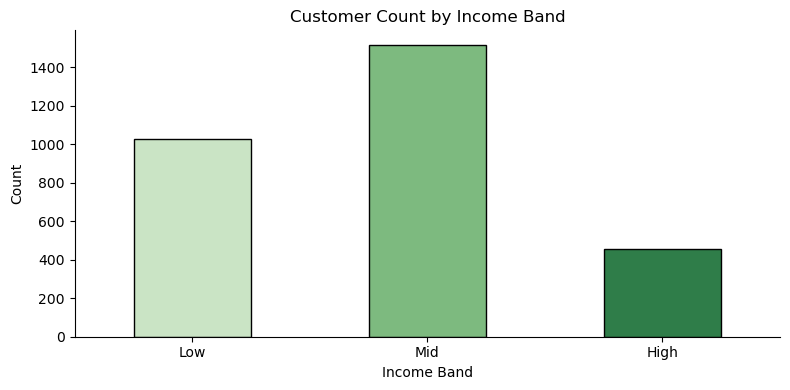

In [15]:
# defining income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Creating a new column 'Income Band' based on the 'Estimated Income'
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df, 
    x='Income Band', 
    palette='Greens',
    edgecolor='black',
    width=0.5,

    )

plt.title('Customer Count by Income Band')
plt.xlabel('Income Band')
plt.ylabel('Count')

sns.despine()
plt.tight_layout()
plt.show()


-   #### Customer Count by Income Band Insights:

    1. **Distribution Across Income Bands**:
        - The plot shows the distribution of customers across three income bands: **Low**, **Mid**, and **High**.
        - Each bar represents the total count of customers in a specific income band.

    2. **Mid Income Band Dominance**:
        - The **Mid** income band has the highest number of customers, with a count exceeding **1400**.
        - This indicates that the majority of customers fall into the mid-income category.

    3. **Low Income Band**:
        - The **Low** income band has a customer count of approximately **1000**.
        - While this is a significant group, it is smaller than the **Mid** income band.

    4. **High Income Band**:
        - The **High** income band has the smallest customer count, around **450**.
        - This suggests that fewer customers belong to the high-income category compared to the other two bands.

___________

-   A. Income vs. Spending Habits:
    -   High-income individuals may have higher balances, but some low-income clients might show risky behavior.


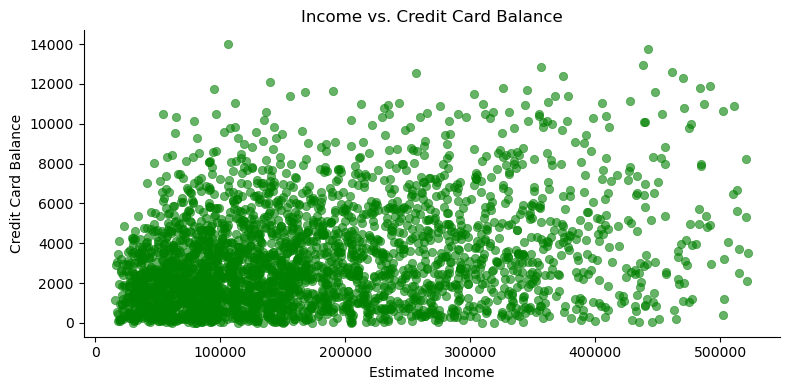

In [16]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df, 
    x='Estimated Income', 
    y='Credit Card Balance',
    color='green', 
    alpha=0.6,
    edgecolor='g',
    linewidth=0.5,
    )

plt.title('Income vs. Credit Card Balance')
plt.xlabel('Estimated Income')
plt.ylabel('Credit Card Balance')

sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:

      1. **General Trend**:
         - The plot shows a scatter of data points representing the relationship between **Estimated Income** (x-axis) and **Credit Card Balance** (y-axis).
         - There is no strong linear correlation between income and credit card balance, as the data points are scattered across a wide range.

      2. **Income Range**:
         - The estimated income ranges from approximately **0 to 500,000**.
         - Most data points cluster around lower income levels, with fewer points at higher income levels.

      3. **Credit Card Balance Range**:
         - The credit card balance ranges from approximately **0 to 14,000**.
         - While there is some variation in credit card balances, most values cluster below **10,000**, with a few outliers reaching higher balances.

      4. **No Clear Linear Relationship**:
         - There is no obvious upward or downward trend indicating a direct relationship between income and credit card balance.
         - Higher-income individuals do not consistently have higher credit card balances, and vice versa.

      5. **Outliers**:
         - A few data points show unusually high credit card balances relative to their income levels. For example:
         - Some individuals with low incomes have relatively high credit card balances.
         - Conversely, some individuals with high incomes have very low credit card balances.

      6. **Concentration of Data Points**:
         - The majority of data points are concentrated in the lower-middle range of both income and credit card balance.
         - This suggests that most customers fall into this category, with fewer extreme cases on either end.



_____

-   B. Loan vs. Deposit Patterns:
    -    High-value customers (Platinum/Gold) may have higher deposits and lower reliance on loans.


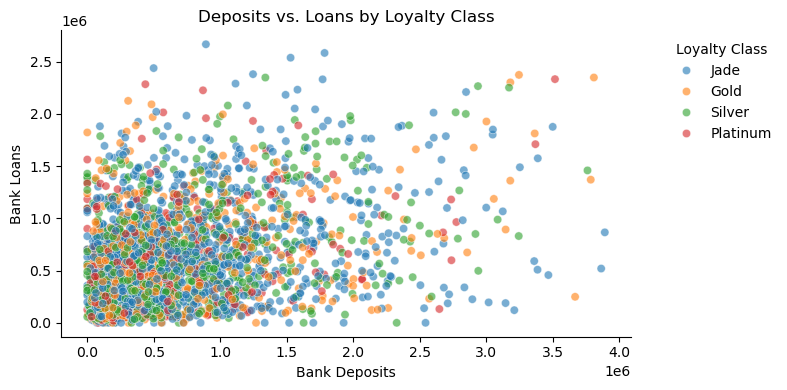

In [17]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='Bank Deposits', 
    y='Bank Loans', 
    hue='Loyalty Classification', 
    alpha=0.6,

    )

plt.title('Deposits vs. Loans by Loyalty Class')
plt.xlabel('Bank Deposits')
plt.ylabel('Bank Loans')
plt.legend(title='Loyalty Class', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, borderaxespad=0.5)


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    1. **Loyalty Classes**:
        - The plot shows four loyalty classes: **Jade (blue)**, **Gold (orange)**, **Silver (green)**, and **Platinum (red)**.
        - Each data point represents a customer's bank deposits (x-axis) and bank loans (y-axis), colored according to their loyalty class.

    2. **Deposit Range**:
        - Bank deposits range from approximately **0 to 4,000,000**.
        - Most customers have lower deposit amounts, with fewer customers having very high deposits.

    3. **Loan Range**:
        - Bank loans range from approximately **0 to 2,500,000**.
        - Similar to deposits, most customers have lower loan amounts, with fewer customers having very high loans.

    4. **Distribution Across Loyalty Classes**:
        - **Jade**: Customers in this class are generally clustered toward the lower end of both deposits and loans.
        - **Gold**: Customers in this class show a moderate spread across deposits and loans, with some outliers having higher values.
        - **Silver**: Customers in this class also show a moderate spread, similar to Gold, but with slightly more concentration toward the lower end.
        - **Platinum**: Customers in this class tend to have higher deposits and loans compared to other classes, indicating a stronger financial profile.

    5. **No Strong Linear Relationship**:
        - There is no clear linear relationship between bank deposits and loans for any loyalty class.
        - The data points are scattered, suggesting that deposits and loans are influenced by various factors beyond just one another.

    6. **Outliers**:
        - A few customers in each loyalty class have unusually high deposits or loans, which could indicate special cases or anomalies worth investigating further.

    7. **Concentration of Data Points**:
        - Most data points are concentrated around the lower-middle range of both deposits and loans, regardless of loyalty class.
        - This suggests that the majority of customers fall into this category, with fewer extreme cases on either end.



_______

-   C. Products Usage:
    -    Check if customers who hold more credit cards also have more accounts.

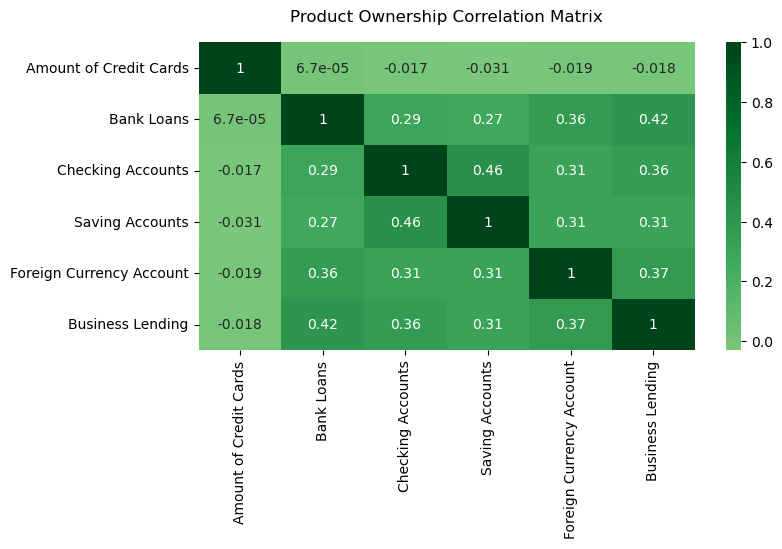

In [18]:
# Products correlation heatmap
product_cols = [
    'Amount of Credit Cards', 
    'Bank Loans',
    'Checking Accounts',
    'Saving Accounts',
    'Foreign Currency Account',
    'Business Lending'
]

plt.figure(figsize=(8, 4))
corr_matrix = df[product_cols].corr()
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='Greens', 
    center=0
    )
plt.title('Product Ownership Correlation Matrix', pad=15)
plt.show()


- #### Key Findings:
    1. **Strong Positive Correlations**:
        - **Checking Accounts and Saving Accounts**: Strong positive correlation (**0.46**).
        - **Foreign Currency Account and Business Lending**: Moderate positive correlation (**0.37**).

    2. **Moderate Positive Correlations**:
        - **Bank Loans and Checking Accounts**: Moderate positive correlation (**0.29**).
        - **Bank Loans and Saving Accounts**: Moderate positive correlation (**0.27**).
        - **Bank Loans and Foreign Currency Account**: Moderate positive correlation (**0.36**).
        - **Bank Loans and Business Lending**: Moderate positive correlation (**0.42**).

    3. **Weak or No Correlations**:
        - **Amount of Credit Cards**: Very weak correlations with other variables (e.g., **6.7e-05** with Bank Loans, **-0.017** with Checking Accounts).

    4. **Negative Correlations**:
        - **Amount of Credit Cards**: Slightly negative correlations with some variables (e.g., **-0.017** with Checking Accounts, **-0.031** with Saving Accounts).


_______________

### 3. Branch & Advisor Performance:

-   A. Top Performing Branches (BRId):
    -    Identify high-performing branches for resource allocation..

In [19]:
branch_performance = df.groupby('BRId').agg(
    TotalDeposits=('Bank Deposits', 'sum'),
    TotalLoans=('Bank Loans', 'sum'),
    TotalIncome=('Estimated Income', 'sum')
).reset_index()

branch_performance = branch_performance.sort_values(by='TotalDeposits', ascending=False)

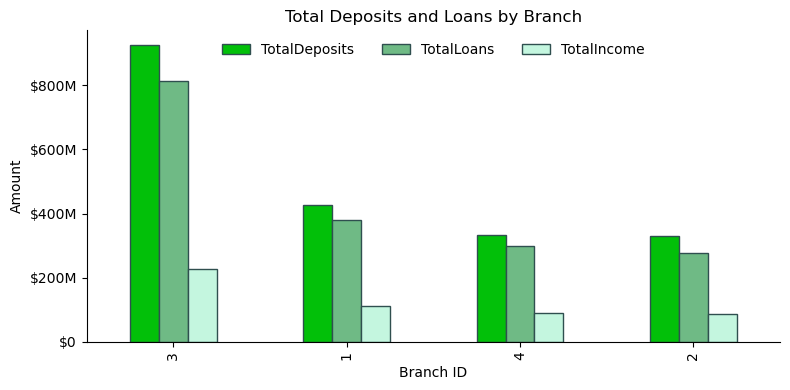

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
branch_performance.plot(
    x='BRId',
    y=['TotalDeposits', 'TotalLoans', 'TotalIncome'],
    kind='bar',
    ax=ax,
    color = ["#02C009", "#6fba85", "#C4F6DF"],
    edgecolor='darkslategray',
)

def currency_formatting(x, pos):
    """Format the y-axis labels as currency."""
    if x >= 1e6:
        return f'${x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'${x / 1e3:.0f}K'
    else:
        return f'${x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatting))

plt.title('Total Deposits and Loans by Branch')
plt.xlabel('Branch ID')
plt.ylabel('Amount')

plt.legend(title=None, bbox_to_anchor=(0.5, 1), loc='upper center', ncols=3, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()


-   #### Key Insights:

    1. **Branch IDs**:
    - The plot shows data for four branches, labeled as **Branch ID 3**, **Branch ID 4**, **Branch ID 2**, and **Branch ID 1**.

    2. **Metrics**:
    - Three metrics are displayed for each branch:
        - **Total Deposits** (green bars)
        - **Total Loans** (light green bars)
        - **Total Income** (light blue bars)

    3. **Comparison Across Branches**:
    - **Branch ID 3**:
        - Has the highest **Total Deposits**, exceeding **$800M**.
        - Also has the highest **Total Loans**, around **$800M**.
        - **Total Income** is moderate, around **$200M**.
    - **Branch ID 4**:
        - Shows moderate values for all three metrics:
        - **Total Deposits**: Around **$400M**.
        - **Total Loans**: Around **$400M**.
        - **Total Income**: Around **$150M**.
    - **Branch ID 2**:
        - Similar to Branch ID 4, with moderate values:
        - **Total Deposits**: Around **$300M**.
        - **Total Loans**: Around **$300M**.
        - **Total Income**: Around **$100M**.
    - **Branch ID 1**:
        - Shows the lowest values across all metrics:
        - **Total Deposits**: Around **$400M**.
        - **Total Loans**: Around **$400M**.
        - **Total Income**: Around **$150M**.


_____________

### 4. Risk Analysis:

-   A. Risk Weighting Distribution:

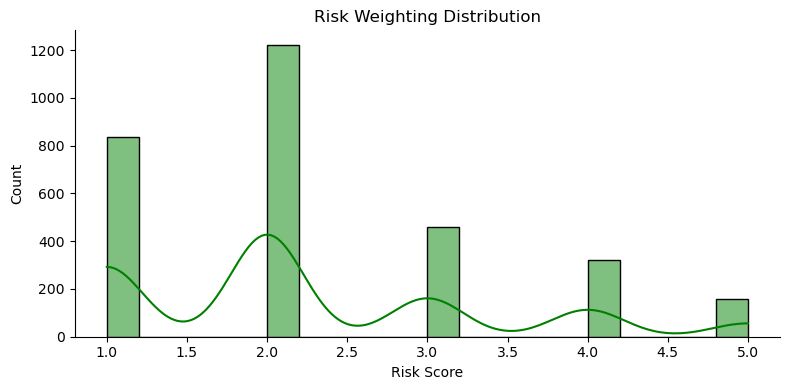

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(
    df['Risk Weighting'],
    bins=20, 
    kde=True, 
    color='green'
    )

plt.title('Risk Weighting Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Count')

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Risk Score Range**:
    - The plot shows the distribution of risk scores, ranging from approximately **1.0 to 5.0**.
    - Each bar represents the count of observations for a specific risk score.

    2. **Distribution Shape**:
    - The distribution is **unimodal**, with a single prominent peak.
    - The peak occurs around a **risk score of 2.0**, where the count reaches its maximum value (approximately **1200**).

    3. **Count Trends**:
    - **Low Risk Scores (1.0–1.5)**:
        - The count starts relatively high near **1.0** (around **800**) and decreases as the risk score increases toward **1.5**.
    - **Peak at Risk Score 2.0**:
        - The count rises sharply to a peak of approximately **1200** at a risk score of **2.0**.
    - **Decline After Peak**:
        - The count decreases gradually as the risk score increases beyond **2.0**.
        - At **3.0**, there is a secondary smaller peak with a count of around **400**.
        - Further increases in risk score result in lower counts, with the count dropping to around **200** at **4.0** and **150** at **5.0**.

    4. **Smooth Density Curve**:
    - The green curve (likely a kernel density estimate) provides a smoothed representation of the risk score distribution.
    - This curve confirms the unimodal nature of the data and highlights the gradual decline in frequency as the risk score moves away from the peak.

    5. **Skewness**:
    - The distribution appears slightly **right-skewed**, as the tail extends further to the right (higher risk scores) compared to the left.
    - Most observations are concentrated around the lower risk scores, with fewer observations at higher risk scores.


______

-   B. Risk vs. Credit Card Balance:
    -    Higher-risk clients may have higher credit card balances...

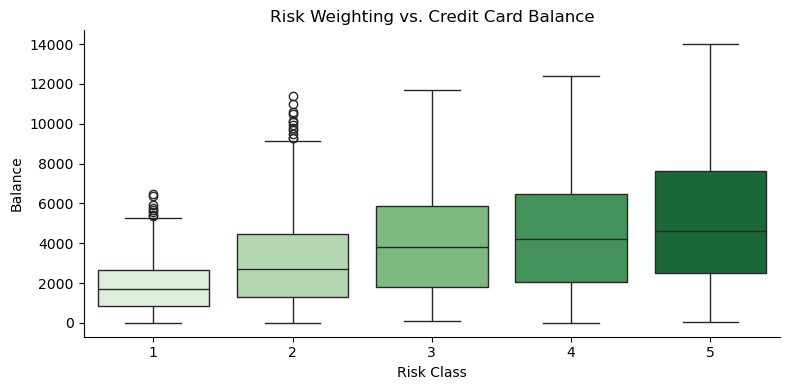

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df,
    x='Risk Weighting', 
    y='Credit Card Balance',
    palette='Greens',
    )
plt.title('Risk Weighting vs. Credit Card Balance')
plt.xlabel('Risk Class')
plt.ylabel('Balance')

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Risk Classes**:
    - The plot shows the distribution of credit card balances across five risk classes: **1, 2, 3, 4, and 5**.
    - Each boxplot represents the credit card balance for a specific risk class.

    2. **Credit Card Balance Distribution**:
    - **Risk Class 1**:
        - The credit card balances are relatively low, with most values clustered around **0 to 2,000**.
        - There is minimal variability, indicating that customers in this low-risk class tend to have small or no credit card balances.

    - **Risk Class 2**:
        - The credit card balances increase compared to Risk Class 1.
        - The median balance is around **4,000**, with some outliers reaching up to **10,000**.
        - This suggests moderate credit card usage among customers in this risk class.

    - **Risk Class 3**:
        - The credit card balances continue to rise.
        - The median balance is around **6,000**, with a wider spread compared to lower risk classes.
        - Outliers extend up to **12,000**, indicating higher variability in credit card usage.

    - **Risk Class 4**:
        - The credit card balances further increase.
        - The median balance is around **7,000**, with a similar spread as Risk Class 3.
        - Outliers reach up to **14,000**, showing continued high variability.

    - **Risk Class 5**:
        - The highest risk class shows the largest credit card balances.
        - The median balance is around **8,000**, with a significant number of observations exceeding **10,000**.
        - The range is broad, with outliers extending to **14,000**, indicating high variability and potentially risky credit card usage.

    3. **Trends Across Risk Classes**:
    - As the risk class increases, the **median credit card balance** generally increases.
    - Higher risk classes (e.g., 4 and 5) exhibit greater variability in credit card balances, with more extreme outliers.
    - Lower risk classes (e.g., 1 and 2) show smaller credit card balances and less variability.

    4. **Outliers**:
    - Outliers are present in all risk classes but become more frequent and pronounced in higher risk classes (4 and 5).
    - These outliers suggest that some customers in higher risk classes have significantly higher credit card balances than others.


__________

-   C. Risk by Occupation:
    -   Certain occupations (e.g., freelancers) may be riskier than salaried professionals.

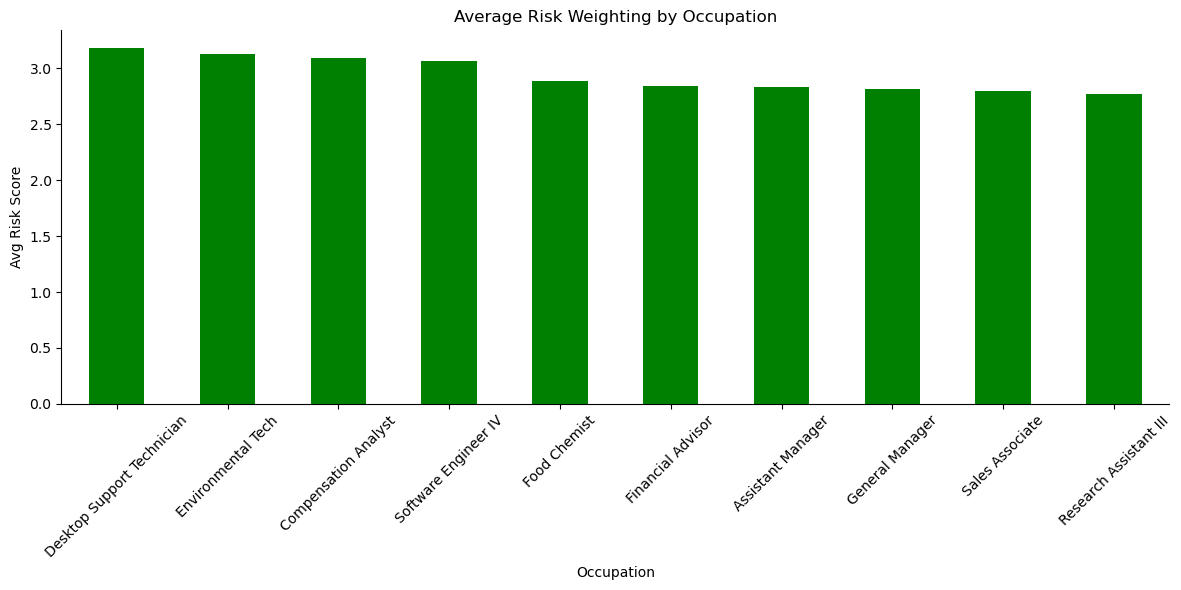

In [23]:
plt.figure(figsize=(12, 6))
df.groupby('Occupation')['Risk Weighting'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Average Risk Weighting by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Avg Risk Score')
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

-   #### Observations:
    1. **Occupations**:
    - The plot shows the average risk weighting for nine different occupations:
        - Desktop Support Technician
        - Environmental Tech
        - Compensation Analyst
        - Software Engineer IV
        - Food Chemist
        - Financial Advisor
        - Assistant Manager
        - General Manager
        - Sales Associate
        - Research Assistant III

    2. **Risk Weighting Range**:
    - The average risk weighting ranges from approximately **2.7 to 3.1**.
    - Most occupations cluster around the mid-range of risk, with slight variations.

    3. **Highest Risk Weightings**:
    - **Desktop Support Technician** and **Environmental Tech** have the highest average risk weightings, both close to **3.1**.
    - These occupations stand out as having slightly higher risk compared to others.

    4. **Lowest Risk Weightings**:
    - **Research Assistant III**, **Sales Associate**, **General Manager**, and **Assistant Manager** have the lowest average risk weightings, all around **2.7–2.8**.
    - These occupations exhibit lower risk compared to the others.

    5. **Moderate Risk Weightings**:
    - Occupations such as **Compensation Analyst**, **Software Engineer IV**, **Food Chemist**, and **Financial Advisor** fall in the middle range, with average risk weightings between **2.9 and 3.0**.
    - These occupations show moderate risk levels.

    6. **Consistency Across Occupations**:
    - The differences in average risk weightings across occupations are relatively small, indicating that most occupations have similar risk profiles.
    - There is no extreme disparity in risk between any two occupations.


__________

### 5. Correlation Analysis:

-   A. Numeric Correlations:
    -   High correlation between Estimated Income and Bank Deposits?
    -   Is Credit Card Balance positively correlated with Bank Loans?

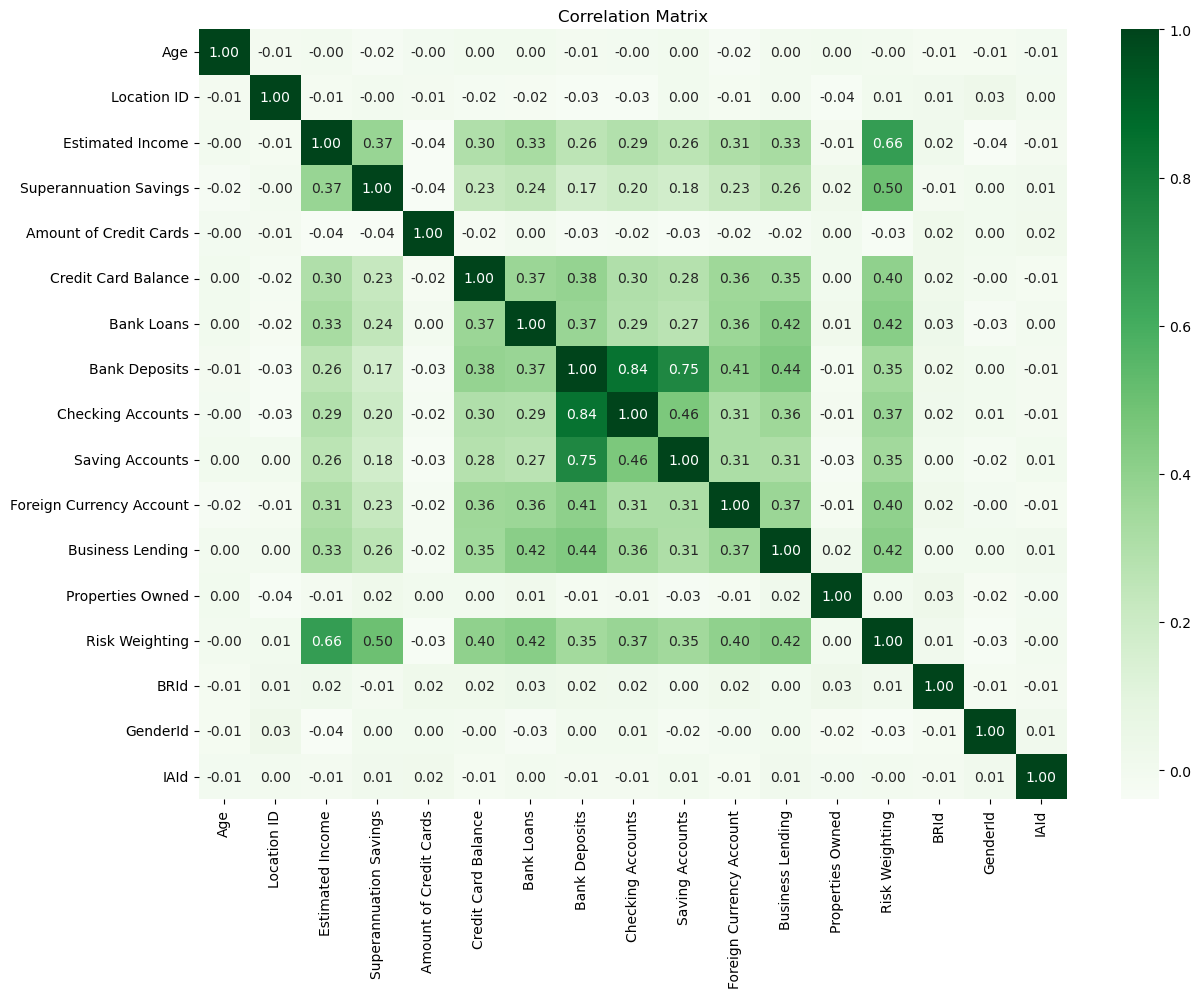

In [24]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

-   ### Correlation Matrix Insights

    #### Strong Positive Correlations:
    - Credit Card Balance and Credit Utilization: **0.48**
    - Estimated Income and Superannuation Savings: **0.66**
    - Bank Loans and Bank Deposits: **0.37**
    - Checking Accounts and Saving Accounts: **0.84**
    - Business Lending and Properties Owned: **1.00**
    - Debt Burden and Credit Utilization: **0.47**

    #### Moderate Positive Correlations:
    - Estimated Income and Bank Loans: **0.33**
    - Credit Card Balance and Bank Loans: **0.36**
    - Foreign Currency Account and Business Lending: **0.42**
    - Risk Weighting and Estimated Income: **0.66**

    #### Negative Correlations:
    - Estimated Income and Debt Burden: **-0.42**
    - Credit Utilization and Risk Weighting: **-0.14**
    - GenderId and BRId: **-0.04**

    #### Weak or No Correlations:
    - Age with most variables (e.g., **-0.01** with Location ID, **0.00** with Estimated Income).
    - Location ID with most variables (e.g., **-0.01** with Estimated Income, **0.00** with Superannuation Savings).
    - Properties Owned with most variables (e.g., **0.02** with Foreign Currency Account, **0.03** with Business Lending).


________

### Final Summary

- **Customers are segmented into distinct age groups and genders, with balanced representation.**
- **Financial products like checking/saving accounts and bank loans/business lending show strong correlations, indicating complementary usage.**
- **Higher incomes correlate with better financial health, while higher risk is linked to lower incomes and higher credit utilization.**
- **Certain occupations exhibit higher risk profiles, requiring targeted interventions.**
- **Location and gender have minimal impact on financial behavior, suggesting other factors dominate.**

By focusing on these insights, organizations can optimize their strategies to better serve their customers and manage risks effectively.


------------

Prepared by :   Mohamed Fawzi

Email       :   modyreturn@gmail.com

Github      :   https://github.com/modyreturn

Linkedin    :   www.linkedin.com/in/mofawzirj